In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [3]:
text_df = df.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet','Sentiment'], axis=1)
text_df.head()

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."


In [4]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



In [5]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]|[\U0001F600-\U0001F6FF]|[\U0001F300-\U0001F5FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [6]:
text_df.Tweet = text_df['Tweet'].apply(data_processing)

In [7]:
text_df = text_df.drop_duplicates('Tweet')

In [8]:
import string
english_punctuations=string.punctuation
print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
#clearning and removing punctuations
import string
english_punctuations=string.punctuation

punctuation_list=english_punctuations

def cleaning_punctuations(data):
    translator=str.maketrans('', '',punctuation_list)
    return data.translate(translator)

text_df['Tweet']=text_df['Tweet'].apply(lambda x: cleaning_punctuations(x))

In [10]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: stemming(x))

In [12]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

drinking today tucantribe madbears lkincalgo algoanna worldcup2022 

amazing canadasocceren worldcup2022 launch video shows much face canada mens national team changed since last world cup entry 1986 cant wait see boys action canada fifa world cup opening video 

worth reading watching worldcup2022 

golden maknae shinning bright jeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 worldcup2022 fifakook btstwt 

bbc cares much human rights homosexual rights women rights say opening ceremony saying opening ceremony bbc censor worldcup2022 opening ceremony 



In [13]:
import nltk

In [14]:
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()

def lemmatizer_on_word(data):
    text=[lm.lemmatize(word) for word in data]
    return data


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
text_df['Tweet']=text_df['Tweet'].apply(lambda x:lemmatizer_on_word(x))

In [16]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

drinking today tucantribe madbears lkincalgo algoanna worldcup2022 

amazing canadasocceren worldcup2022 launch video shows much face canada mens national team changed since last world cup entry 1986 cant wait see boys action canada fifa world cup opening video 

worth reading watching worldcup2022 

golden maknae shinning bright jeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 worldcup2022 fifakook btstwt 

bbc cares much human rights homosexual rights women rights say opening ceremony saying opening ceremony bbc censor worldcup2022 opening ceremony 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21345 entries, 0 to 22523
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   21345 non-null  object
dtypes: object(1)
memory usage: 333.5+ KB


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [19]:
def sentiment_Vader(text):
    over_all_polarity = sid.polarity_scores(text)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [20]:
sentiment = text_df['Tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
text_df.head()

,Tweet
0,drinking today tucantribe madbears lkincalgo a...
1,amazing canadasocceren worldcup2022 launch vid...
2,worth reading watching worldcup2022
3,golden maknae shinning bright jeonjungkook jun...
4,bbc cares much human rights homosexual rights ...


In [21]:
polarity = text_df['Tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
text_df['Polarity'] = polarity
text_df.head()

,Tweet,Polarity
0,drinking today tucantribe madbears lkincalgo a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,amazing canadasocceren worldcup2022 launch vid...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp..."
2,worth reading watching worldcup2022,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp..."
3,golden maknae shinning bright jeonjungkook jun...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
4,bbc cares much human rights homosexual rights ...,"{'neg': 0.125, 'neu': 0.75, 'pos': 0.125, 'com..."


In [22]:
# for sen in text_df['Sentiment']:
text_df['Compound'] = text_df['Polarity'].apply(lambda score_dict: score_dict['compound'])
text_df.head()

,Tweet,Polarity,Compound
0,drinking today tucantribe madbears lkincalgo a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,amazing canadasocceren worldcup2022 launch vid...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.5859
2,worth reading watching worldcup2022,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.2263
3,golden maknae shinning bright jeonjungkook jun...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5859
4,bbc cares much human rights homosexual rights ...,"{'neg': 0.125, 'neu': 0.75, 'pos': 0.125, 'com...",0.0000


In [23]:
text_df["sentiment"] =text_df["Tweet"].apply(sentiment_Vader)
text_df.head()

,Tweet,Polarity,Compound,sentiment
0,drinking today tucantribe madbears lkincalgo a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,amazing canadasocceren worldcup2022 launch vid...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.5859,positive
2,worth reading watching worldcup2022,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.2263,positive
3,golden maknae shinning bright jeonjungkook jun...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5859,positive
4,bbc cares much human rights homosexual rights ...,"{'neg': 0.125, 'neu': 0.75, 'pos': 0.125, 'com...",0.0000,neutral


<Axes: xlabel='sentiment', ylabel='count'>

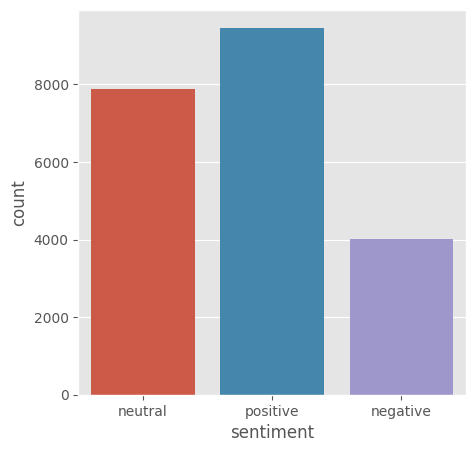

In [24]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

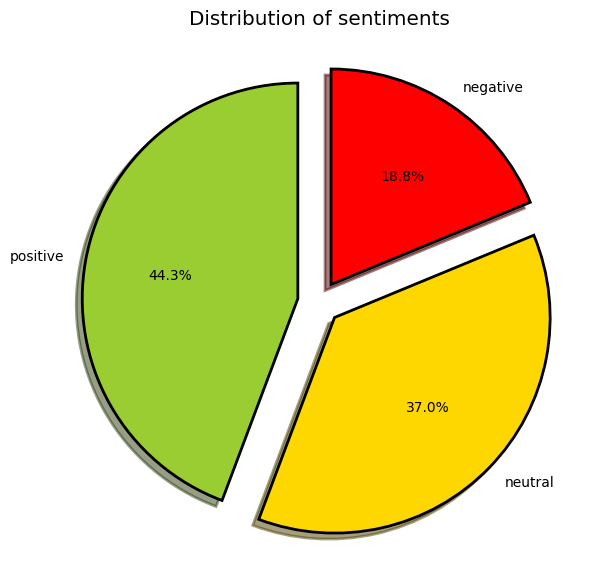

In [25]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [26]:
pos_tweets = text_df[text_df.sentiment == 'positive']
pos_tweets = pos_tweets.sort_values(['Compound'], ascending= False)
pos_tweets.head()

,Tweet,Polarity,Compound,sentiment
14263,jungkookinqatar bts jungkook worldcup2022 grea...,"{'neg': 0.0, 'neu': 0.146, 'pos': 0.854, 'comp...",0.9837,positive
953,count great potential unmissable event enhance...,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...",0.9828,positive
11336,help little soul sleep comfort amp safety beau...,"{'neg': 0.044, 'neu': 0.364, 'pos': 0.591, 'co...",0.9809,positive
13173,love jungkook dreamers dreamers2022 openingcer...,"{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'comp...",0.9808,positive
12717,best best jung kook winner every armys hearti ...,"{'neg': 0.042, 'neu': 0.391, 'pos': 0.567, 'co...",0.9788,positive


In [27]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweet'])

In [28]:
X = text_df['Tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (17076, 160122)
Size of y_train: (17076,)
Size of x_test: (4269, 160122)
Size of y_test: (4269,)


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 83.42%


In [33]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 457  195  132]
 [  37 1507   54]
 [  89  201 1597]]


              precision    recall  f1-score   support

    negative       0.78      0.58      0.67       784
     neutral       0.79      0.94      0.86      1598
    positive       0.90      0.85      0.87      1887

    accuracy                           0.83      4269
   macro avg       0.82      0.79      0.80      4269
weighted avg       0.84      0.83      0.83      4269



In [34]:
from sklearn.linear_model import SGDClassifier



In [35]:
# Assuming x_train, y_train, x_test, and y_test are properly defined

# Create an SGD Classifier model
sgd_clf = SGDClassifier()

# Train the model
sgd_clf.fit(x_train, y_train)

# Make predictions on the test set
sgd_pred = sgd_clf.predict(x_test)

# Calculate accuracy
sgd_acc = accuracy_score(y_test, sgd_pred)

# Print the result
print("Test accuracy: {:.2f}%".format(sgd_acc * 100))

Test accuracy: 85.71%


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, and y_test are properly defined

# Create a Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(x_train, y_train)

# Make predictions on the test set
rf_pred = rf_clf.predict(x_test)

# Calculate accuracy
rf_acc = accuracy_score(y_test, rf_pred)

# Print the result
print("Test accuracy: {:.2f}%".format(rf_acc * 100))


Test accuracy: 81.82%


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, and y_test are properly defined

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with Random Forest and the parameter grid
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)

# Fit the model
grid.fit(x_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters:", grid.best_params_)

# Make predictions on the test set using the best model
y_pred = grid.predict(x_test)

# Calculate accuracy
rf_acc = accuracy_score(y_pred, y_test)

# Print the result
print("Test accuracy: {:.2f}%".format(rf_acc * 100))
